<a href="https://colab.research.google.com/github/241b150-star/APS-LAB/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Sample Input: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sample Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
Expected Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
Sample test passed successfully!

Measuring performance for Counting Sort...
Input size: 100, Time: 0.000064 seconds
Input size: 500, Time: 0.000125 seconds
Input size: 1000, Time: 0.000182 seconds
Input size: 2000, Time: 0.000303 seconds
Input size: 5000, Time: 0.000676 seconds
Input size: 10000, Time: 0.001292 seconds
Input size: 20000, Time: 0.002543 seconds
Input size: 50000, Time: 0.006208 seconds


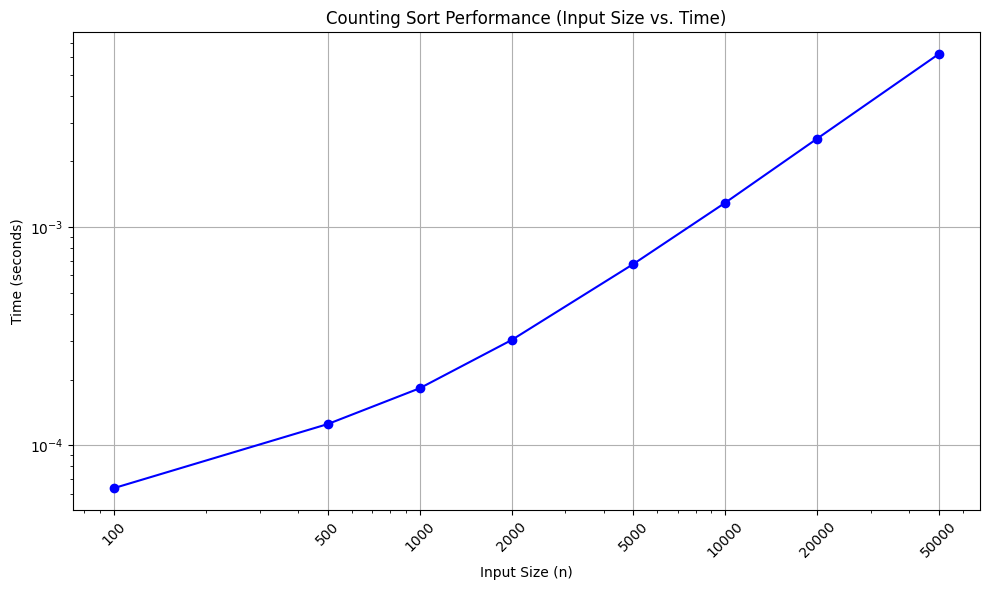

In [1]:
import time
import matplotlib.pyplot as plt
import random
def counting_sort(arr):
    if not arr:
        return []
    max_val = max(arr)
    # The problem statement says values range from 0 to k, so we ensure this range.
    count = [0] * (max_val + 1)
    # each time a value appears, increment the counter in its bucket.
    for num in arr:
        count[num] += 1
    # Each bucket's key represents a value in the array.
    # So for each bucket, from smallest key to largest, add the index of the bucket
    # to the input array and decrease the counter in said bucket by one; until the counter is zero.
    sorted_arr = []
    for i in range(len(count)):
        while count[i] > 0:
            sorted_arr.append(i)
            count[i] -= 1
    return sorted_arr
# Sample Input from the problem statement
sample_input = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
sample_output = counting_sort(sample_input)
print(f"Sample Input: {sample_input}")
print(f"Sample Output: {sample_output}")
print(f"Expected Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]")
assert sample_output == [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
print("Sample test passed successfully!")

# --- Compute running time and plot graph ---
def measure_time(sort_func, arr):
    start_time = time.perf_counter()
    sort_func(arr)
    end_time = time.perf_counter()
    return end_time - start_time
# Generate various input sizes and measure performance
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
times = []
max_k = 1000 # Assuming k (max value) is limited for these tests
print("\nMeasuring performance for Counting Sort...")
for size in input_sizes:
    # Generate a random list of integers for the given size
    # Values range from 0 to max_k to simulate the 'k' factor
    data = [random.randint(0, max_k) for _ in range(size)]
    time_taken = measure_time(counting_sort, data)
    times.append(time_taken)
    print(f"Input size: {size}, Time: {time_taken:.6f} seconds")
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times, marker='o', linestyle='-', color='b')
plt.title('Counting Sort Performance (Input Size vs. Time)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log') # Use log scale for x-axis if sizes vary widely
plt.yscale('log') # Use log scale for y-axis to better visualize larger values
plt.xticks(input_sizes, [str(s) for s in input_sizes], rotation=45)
plt.tight_layout()
plt.show()

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Sample Input: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sample Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
Expected Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
Sample test passed successfully!

Measuring performance for Bucket Sort...
Input size: 100, Time: 0.000094 seconds
Input size: 500, Time: 0.000378 seconds
Input size: 1000, Time: 0.000557 seconds
Input size: 2000, Time: 0.001389 seconds
Input size: 5000, Time: 0.002604 seconds
Input size: 10000, Time: 0.004934 seconds
Input size: 20000, Time: 0.010154 seconds
Input size: 50000, Time: 0.025866 seconds


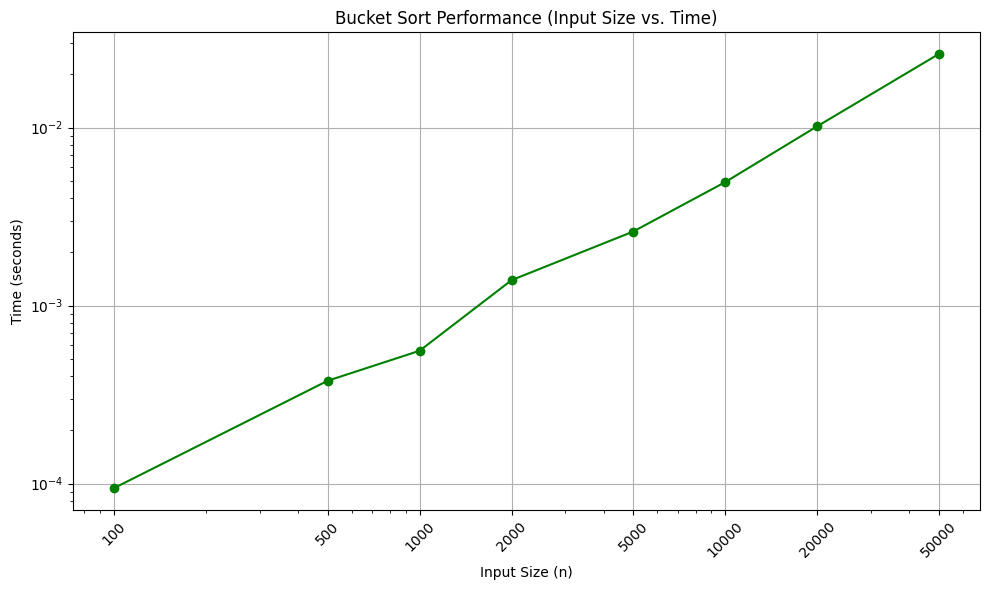

In [2]:
import time
import matplotlib.pyplot as plt
import random
def bucket_sort(arr):
    if not arr:
        return []
    max_val = max(arr) if arr else 0
    min_val = min(arr) if arr else 0
    # If all elements are the same, or list is empty, return as is.
    if max_val == min_val and arr:
        return sorted(arr)
    num_buckets = 10
    if len(arr) > 0 and (max_val - min_val + 1) > num_buckets:
         num_buckets = max(10, int(len(arr) / 2))
    # Initialize empty buckets
    buckets = [[] for _ in range(num_buckets)]
    # Distribute elements into buckets
    for num in arr:
        bucket_index = int((num - min_val)*(num_buckets - 1)/(max_val - min_val))if(max_val - min_val)>0 else 0
        buckets[bucket_index].append(num)
    # Sort each bucket and concatenate the results
    sorted_arr = []
    for bucket in buckets:
        sorted_arr.extend(sorted(bucket)) # Using Python's Timsort for sorting individual buckets
    return sorted_arr
# Sample Input from the problem statement
sample_input = [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
sample_output = bucket_sort(sample_input)
print(f"Sample Input: {sample_input}")
print(f"Sample Output: {sample_output}")
print(f"Expected Output: {sorted(sample_input)}") # Using Python's sorted for expected output
assert sample_output == sorted(sample_input)
print("Sample test passed successfully!")
# --- Compute running time and plot graph ---
def measure_time(sort_func, arr):
    start_time = time.perf_counter()
    sort_func(arr)
    end_time = time.perf_counter()
    return end_time - start_time
# Generate various input sizes and measure performance
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
times = []
max_val_for_test = 1000 # Max value for random numbers in test data
print("\nMeasuring performance for Bucket Sort...")
for size in input_sizes:
    # Generate a random list of integers for the given size
    # Values range from 0 to max_val_for_test to simulate varying distributions
    data = [random.randint(0, max_val_for_test) for _ in range(size)]
    time_taken = measure_time(bucket_sort, data)
    times.append(time_taken)
    print(f"Input size: {size}, Time: {time_taken:.6f} seconds")
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times, marker='o', linestyle='-', color='g')
plt.title('Bucket Sort Performance (Input Size vs. Time)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log') # Use log scale for x-axis if sizes vary widely
plt.yscale('log') # Use log scale for y-axis to better visualize larger values
plt.xticks(input_sizes, [str(s) for s in input_sizes], rotation=45)
plt.tight_layout()
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Sample Input: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sample Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]
Expected Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]
Sample test passed successfully!

Measuring performance for Radix Sort...
Input size: 100, Time: 0.000128 seconds
Input size: 500, Time: 0.000766 seconds
Input size: 1000, Time: 0.001954 seconds
Input size: 2000, Time: 0.003195 seconds
Input size: 5000, Time: 0.009152 seconds
Input size: 10000, Time: 0.014151 seconds
Input size: 20000, Time: 0.038625 seconds
Input size: 50000, Time: 0.179060 seconds


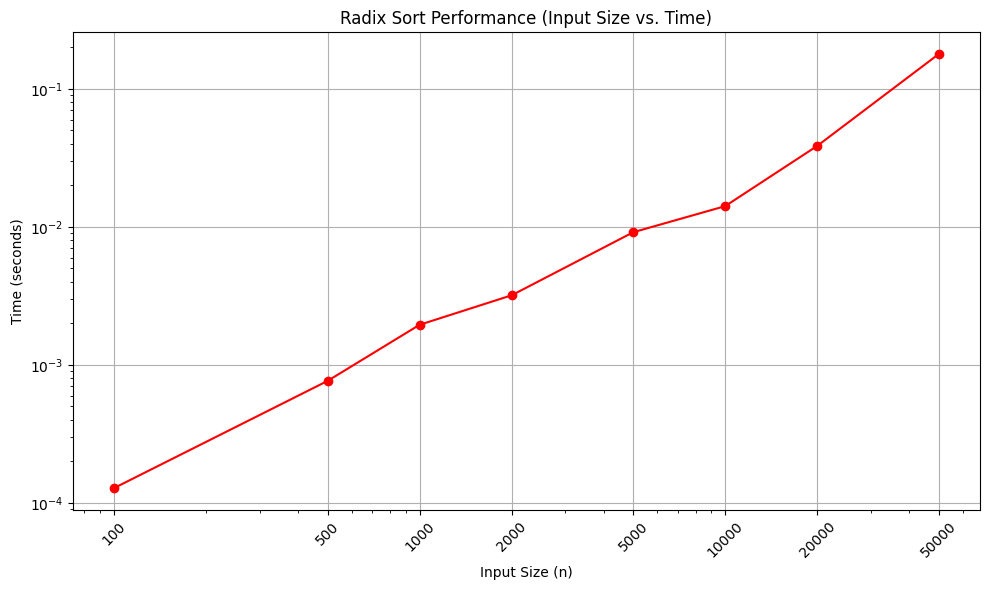

In [3]:
import time
import matplotlib.pyplot as plt
import random

def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10
    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    for i in range(n):
        arr[i] = output[i]
def radix_sort(arr):
    if not arr:
        return []
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10
    return arr
# Sample Input from the problem statement
sample_input = [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
sample_output = radix_sort(list(sample_input))
print(f"Sample Input: {sample_input}")
print(f"Sample Output: {sample_output}")
print(f"Expected Output: {sorted(sample_input)}")
assert sample_output == sorted(sample_input)
print("Sample test passed successfully!")
# --- Compute running time and plot graph ---
def measure_time(sort_func, arr):
    start_time = time.perf_counter()
    sort_func(arr)
    end_time = time.perf_counter()
    return end_time - start_time
# Generate various input sizes and measure performance
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
times = []
max_val_for_test = 10000 # Max value for random numbers in test data, to ensure multiple digits
print("\nMeasuring performance for Radix Sort...")
for size in input_sizes:
    # Generate a random list of non-negative integers for the given size
    data = [random.randint(0, max_val_for_test) for _ in range(size)]
    # Radix sort modifies the list in place, so pass a copy
    time_taken = measure_time(radix_sort, list(data))
    times.append(time_taken)
    print(f"Input size: {size}, Time: {time_taken:.6f} seconds")
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times, marker='o', linestyle='-', color='r')
plt.title('Radix Sort Performance (Input Size vs. Time)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(input_sizes, [str(s) for s in input_sizes], rotation=45)
plt.tight_layout()
plt.show()